In [11]:
from utility import dse, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

histories_multi_fidelity = parse_pickle.parse_pickle('multi_fidelity_v0.4')
histories_single_fidelity = parse_pickle.parse_pickle('single_fidelity_v0.4', strategy='single_fidelity')
histories_random = parse_pickle.parse_pickle('random_v0.4', strategy='random')

curve_multi_fidelity = plot.get_curve(histories_multi_fidelity, strategy='multi_fidelity')
curve_single_fidelity = plot.get_curve(histories_single_fidelity, strategy='single_fidelity')
curve_random = plot.get_curve(histories_random, strategy='random')


In [12]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

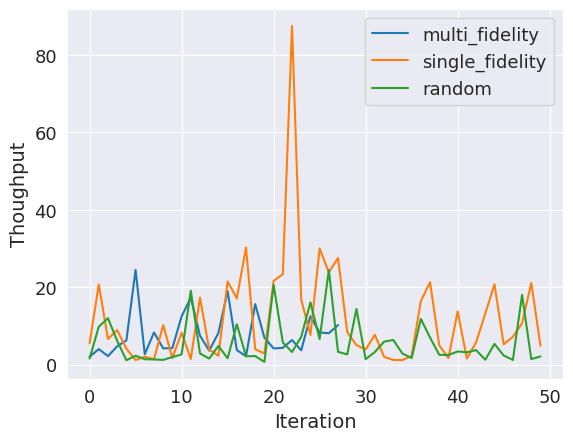

In [13]:
plt.plot(np.arange(len(curve_multi_fidelity[0])), -curve_multi_fidelity[0], label='multi_fidelity')
plt.plot(np.arange(len(curve_single_fidelity)), -curve_single_fidelity, label='single_fidelity')
plt.plot(np.arange(len(curve_random)), -curve_random, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()

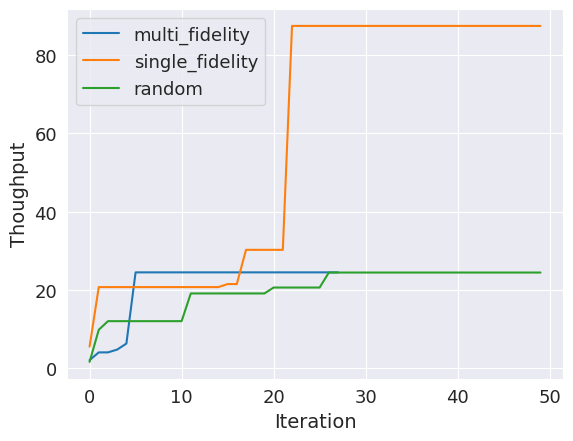

In [14]:
curve_multi_fidelity_max = np.zeros(len(curve_multi_fidelity[0]))
curve_single_fidelity_max = np.zeros(len(curve_single_fidelity))
curve_random_max = np.zeros(len(curve_random))

for i in range(len(curve_multi_fidelity[0])):
    curve_multi_fidelity_max[i] = min(curve_multi_fidelity[0][:i+1])
for i in range(len(curve_single_fidelity)):
    curve_single_fidelity_max[i] = min(curve_single_fidelity[:i+1])
for i in range(len(curve_random)):
    curve_random_max[i] = min(curve_random[:i+1])

plt.plot(np.arange(len(curve_multi_fidelity_max)), -curve_multi_fidelity_max, label='multi_fidelity')
plt.plot(np.arange(len(curve_single_fidelity_max)), -curve_single_fidelity_max, label='single_fidelity')
plt.plot(np.arange(len(curve_random_max)), -curve_random_max, label='random')

plt.xlabel('Iteration')
plt.ylabel('Thoughput')

plt.legend()
plt.show()

In [15]:
import pickle
from openbox import Optimizer, sp, History
from ConfigSpace import Configuration


with open('./result/pickle/single_fidelity_v0.4.pickle', 'rb') as f: # historis shape: max_runs, 3(e.g. None, fidelity1, fidelity2), length of fidelity 1 history (or 2) 
    histories = pickle.load(f)



In [18]:
inc_obj = []
inc_cfg = []
for i in range(len(histories)):
    inc_obj.append(histories[i].get_incumbents()[0].objectives[0])
    inc_cfg.append(histories[i].get_incumbents()[0].config)

print(inc_obj)
print(inc_cfg)

[-54.926193810857185, -320.2189627421928, -62.75819667986555, -276.8323435597214, -85.38858917114585, -38.35685379475239, -186.61906859534068, -43.31331136500939, -49.70666775869505, -56.38044195162411]
[Configuration(values={
  'var00': 64,
  'var01': 256,
  'var02': 4,
  'var03': 512,
  'var04': 4,
  'var05': 4,
  'var06': 1,
  'var07': 32,
  'var08': 24,
  'var09': 900,
  'var10': 8,
  'var11': 18,
})
, Configuration(values={
  'var00': 32,
  'var01': 1024,
  'var02': 8,
  'var03': 64,
  'var04': 4,
  'var05': 4,
  'var06': 1,
  'var07': 40,
  'var08': 48,
  'var09': 900,
  'var10': 8,
  'var11': 13,
})
, Configuration(values={
  'var00': 48,
  'var01': 256,
  'var02': 32,
  'var03': 64,
  'var04': 4,
  'var05': 4,
  'var06': 1,
  'var07': 16,
  'var08': 48,
  'var09': 900,
  'var10': 23,
  'var11': 8,
})
, Configuration(values={
  'var00': 64,
  'var01': 256,
  'var02': 8,
  'var03': 128,
  'var04': 4,
  'var05': 4,
  'var06': 1,
  'var07': 24,
  'var08': 24,
  'var09': 900,
  'var